### Tests
- Pre-initializing weights by optimizing on different image
    - Initialize with ground truth reconstruction or subsampled
- Batch training (3 image per batch)
- Jittering z during training
- L1 loss instead of L2


Nothing provides much help in terms of reconstruction accuracy. 

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
import sys
sys.path.insert(0, '../')
from utils import *


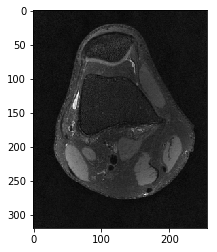

c:\users\jains\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':


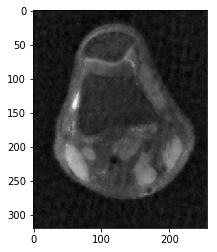

In [21]:
# original vs 6 times subsampled
data = glob("../data/test_img_slices/*.ra")
orig_img = get_image_old2(data[0])
minv = np.min(orig_img[:, :, 0])
maxv = np.max(orig_img[:, :, 0])
orig_img = np.expand_dims(-1 + (2 * (np.array(orig_img[:, :, 0] - minv) / (maxv - minv))), 2)
plt.imshow(orig_img[:, :, 0], cmap='gray')
plt.show()
mask_files = glob("../masks/gen_masks/6_*")
mask_files = [np.fft.fftshift(np.load(m)) for m in mask_files]
mask = mask_files[0]
subs_img = np.fft.ifft2(np.multiply(np.fft.fft2(orig_img[:, :, 0]), mask)).astype(float)
minv = np.min(subs_img)
maxv = np.max(subs_img)
subs_img = np.expand_dims(-1 + (2 * (np.array(subs_img - minv) / (maxv - minv))), 2)
plt.imshow(subs_img[:, :, 0], cmap='gray')
plt.show()

In [22]:
def get_best(name, start, end, compare):
    all_ims = []
    for i in range(start, end + 1):
        all_ims.extend(np.load(name + '{}.npy'.format(i)))
    min_mse, best = np.float('inf'), all_ims[0]
    best_index = 0
    for index in range(1, len(all_ims)):
        img = all_ims[index]
        mse = np.mean(np.square(img[:, :, 0] - compare[:, :, 0]))
        if mse < min_mse:
            #print(mse)
            min_mse = mse
            best = img
            best_index = index
    print(name, best_index, min_mse)
    return best

In [36]:
best_mixed = get_best('../deep_prior_data/recon_mixed', 1, 6, orig_img)
best_mixed_tv = get_best('../deep_prior_data/recon_mixed_tv', 1, 3, orig_img)
best_mixed_new = get_best('../deep_prior_data/recon_mixed_new', 1, 3, orig_img)
best_mixed_jitter = get_best('../deep_prior_data/recon_mixed_jitter', 1, 4, orig_img)
best_mixed_mae = get_best('../deep_prior_data/recon_mixed_mae', 1, 3, orig_img)



best_subsampled = get_best('../deep_prior_data/recon_subsampled', 1, 2, subs_img)

best_full = get_best('../deep_prior_data/recon_full', 1, 5, orig_img)
best_full_jitter = get_best('../deep_prior_data/recon_full_jitter', 1, 6, orig_img)
best_full_altmin = get_best('../deep_prior_data/recon_full_jitter', 1, 4, orig_img)
best_full_mae  = get_best('../deep_prior_data/recon_full_mae', 1, 6, orig_img)

c:\users\jains\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in subtract
  if __name__ == '__main__':
c:\users\jains\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in square
  if __name__ == '__main__':


../deep_prior_data/recon_mixed 27 0.008850796408984219
../deep_prior_data/recon_mixed_tv 155 0.013756638303608812
../deep_prior_data/recon_mixed_new 173 0.010977715829132083
../deep_prior_data/recon_mixed_jitter 10 0.007242542848664724
../deep_prior_data/recon_mixed_mae 100 0.011929771164776346
../deep_prior_data/recon_subsampled 101 0.0006537789885725672
../deep_prior_data/recon_full 304 0.0011869449908226857
../deep_prior_data/recon_full_jitter 450 0.0007637623929506131
../deep_prior_data/recon_full_jitter 302 0.0010849937741673108
../deep_prior_data/recon_full_mae 300 0.0014473522582283866


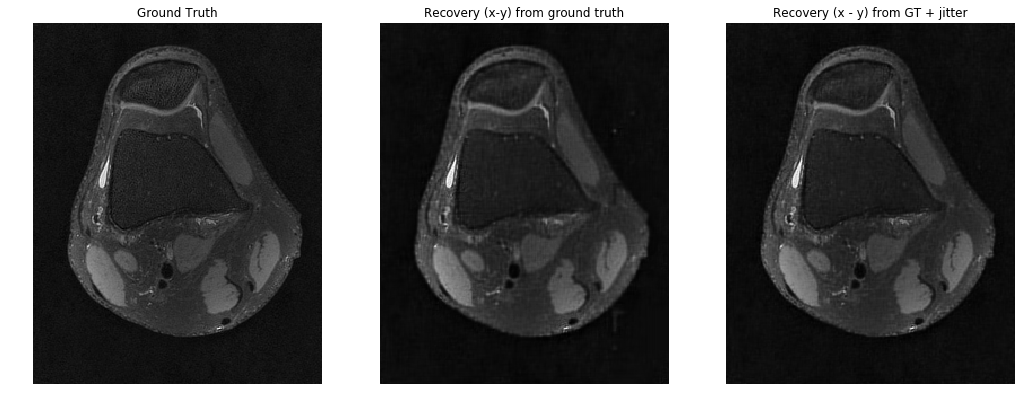

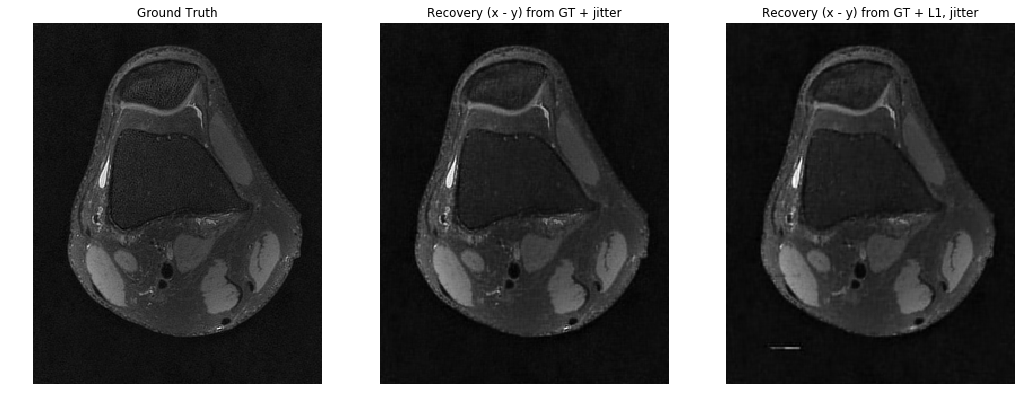

In [44]:
plt.figure(figsize=(30,10))
plt.subplot(151); plt.axis('off'); plt.title('Ground Truth'); plt.imshow(orig_img[:, :, 0], cmap='gray')
plt.subplot(152); plt.axis('off'); plt.title('Recovery (x-y) from ground truth'); plt.imshow(best_full[:, :, 0], cmap='gray')
plt.subplot(153); plt.axis('off'); plt.title('Recovery (x - y) from GT + jitter'); plt.imshow(best_full_jitter[:, :, 0], cmap='gray')
plt.show()
plt.figure(figsize=(30,10))
plt.subplot(151); plt.axis('off'); plt.title('Ground Truth'); plt.imshow(orig_img[:, :, 0], cmap='gray')
#plt.subplot(153); plt.axis('off'); plt.title('Recovery (x - y) from GT + initialize'); plt.imshow(best_full_altmin[:, :, 0], cmap='gray')
plt.subplot(152); plt.axis('off'); plt.title('Recovery (x - y) from GT + jitter'); plt.imshow(best_full_jitter[:, :, 0], cmap='gray')

plt.subplot(153); plt.axis('off'); plt.title('Recovery (x - y) from GT + L1, jitter'); plt.imshow(best_full_mae[:, :, 0], cmap='gray')
plt.show()

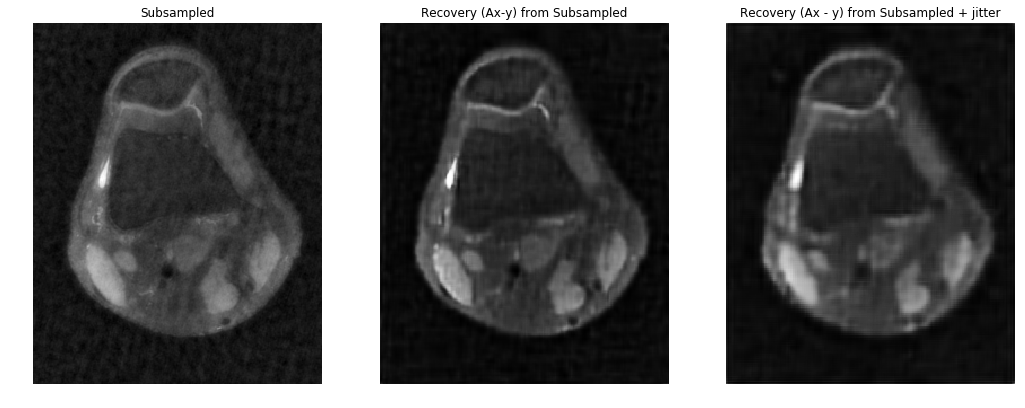

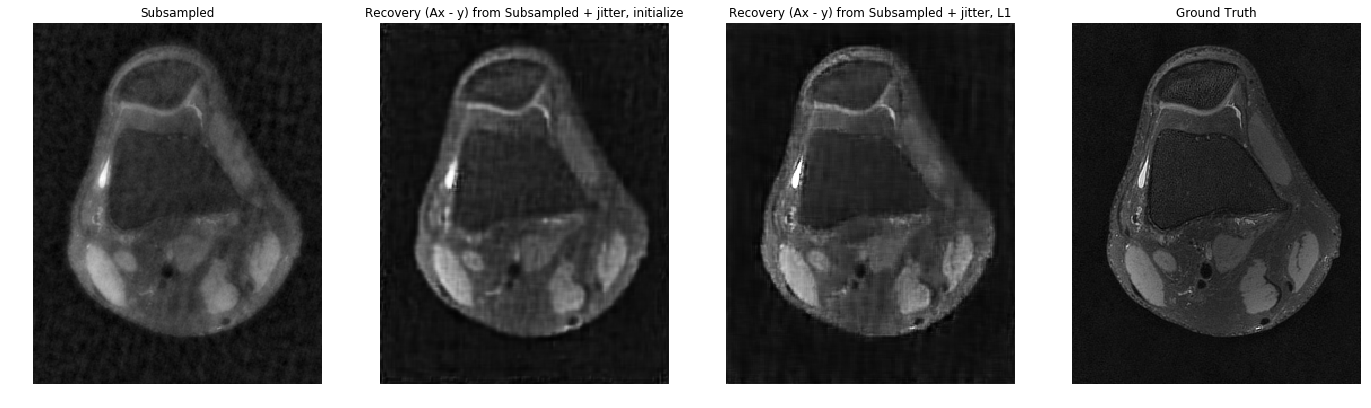

In [40]:
plt.figure(figsize=(30,10))
plt.subplot(151); plt.axis('off'); plt.title('Subsampled'); plt.imshow(subs_img[:, :, 0], cmap='gray')
plt.subplot(152); plt.axis('off'); plt.title('Recovery (Ax-y) from Subsampled'); plt.imshow(best_mixed[:, :, 0], cmap='gray')
plt.subplot(153); plt.axis('off'); plt.title('Recovery (Ax - y) from Subsampled + jitter'); plt.imshow(best_mixed_jitter[:, :, 0], cmap='gray')
plt.show()
plt.figure(figsize=(30,10))
plt.subplot(151); plt.axis('off'); plt.title('Subsampled'); plt.imshow(subs_img[:, :, 0], cmap='gray')
plt.subplot(152); plt.axis('off'); plt.title('Recovery (Ax - y) from Subsampled + jitter, initialize'); plt.imshow(best_mixed_new[:, :, 0], cmap='gray')
plt.subplot(153); plt.axis('off'); plt.title('Recovery (Ax - y) from Subsampled + jitter, L1'); plt.imshow(best_mixed_mae[:, :, 0], cmap='gray')
plt.subplot(154); plt.axis('off'); plt.title('Ground Truth'); plt.imshow(orig_img[:, :, 0], cmap='gray')
plt.show()